<a href="https://colab.research.google.com/github/AshbeeKim/dadaiksunTeamProject/blob/main/ipynb/AshbeeKim/JulyW4MidReport_Ashbee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3주차

이전 데이터로 회귀를 맞추는 게 어렵다는 말에 어차피 사용할 지수로 순위를 구하고, 추천 범위를 설정한 뒤 훈련하면 날씨 변수만 넣어도 바로 추천 여부를 알 수도 있지 않을까 하는 가설 세움

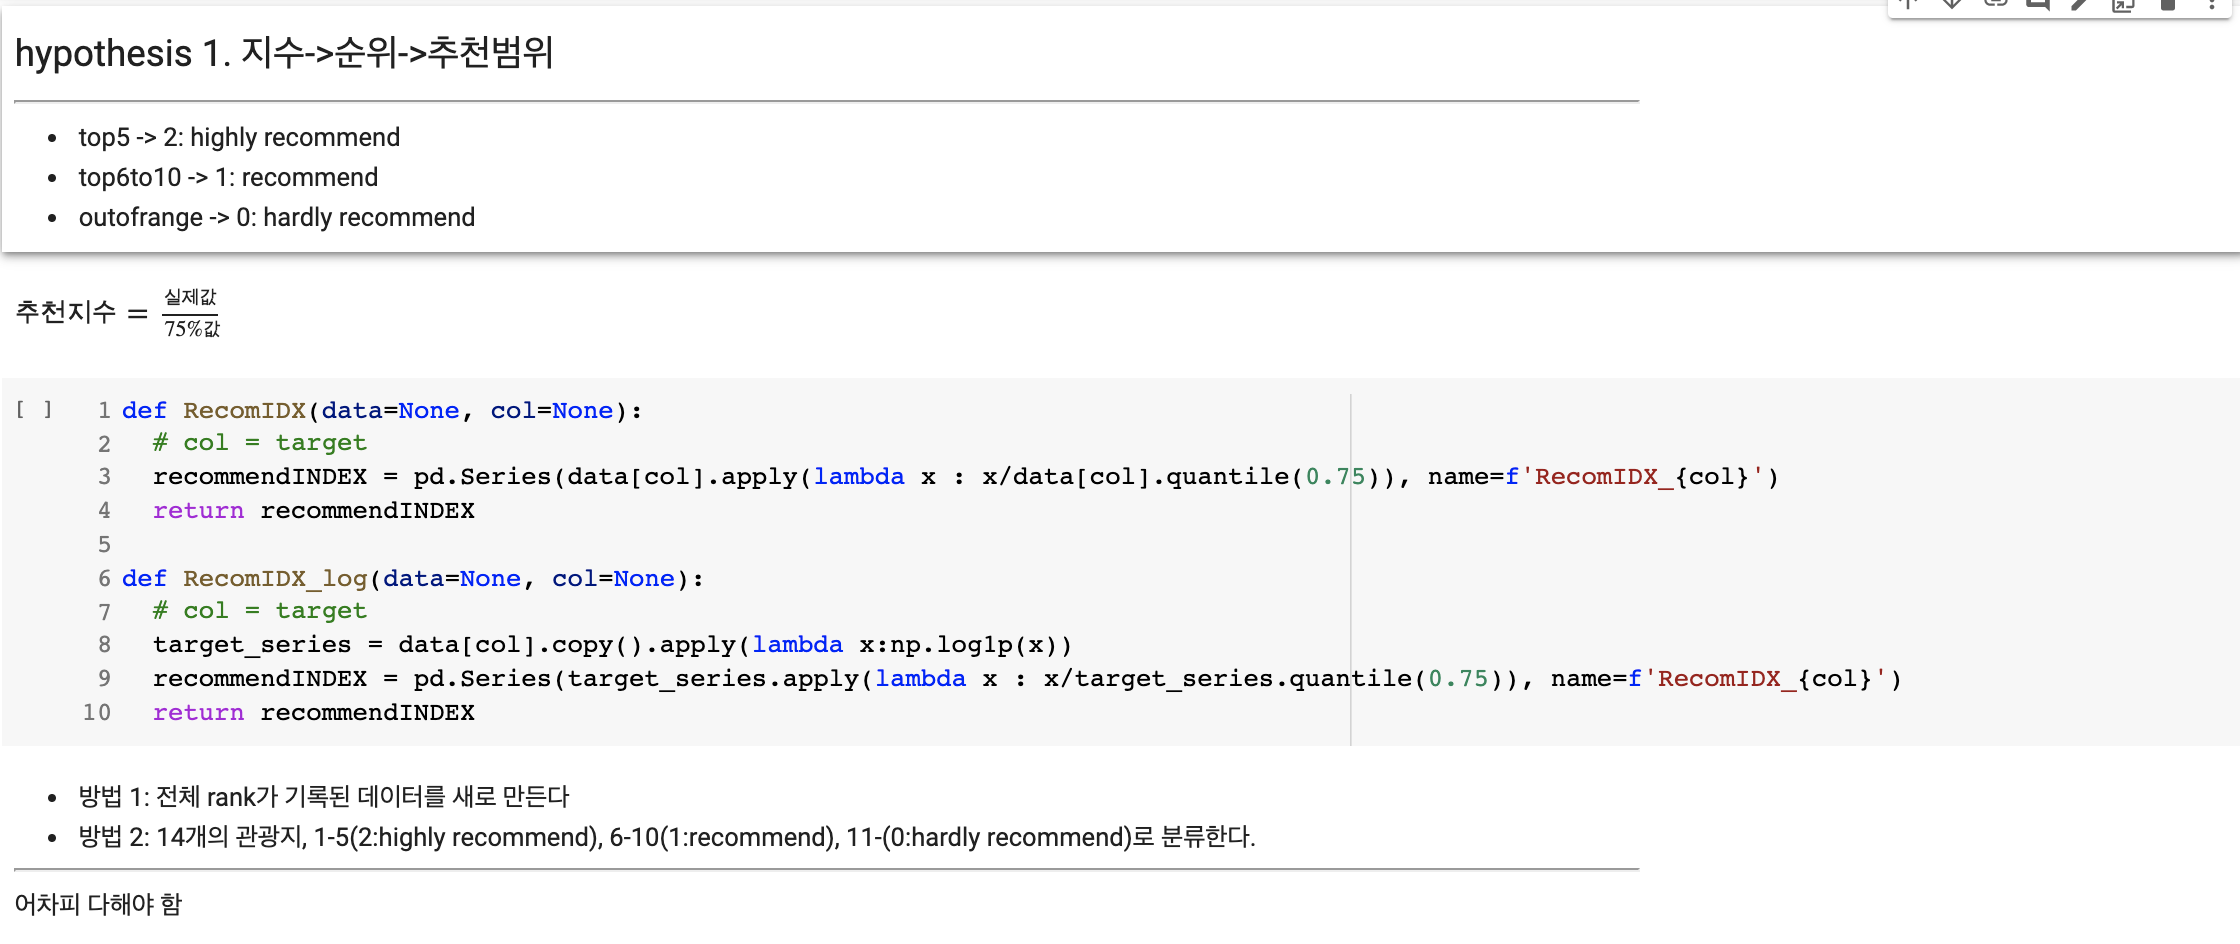

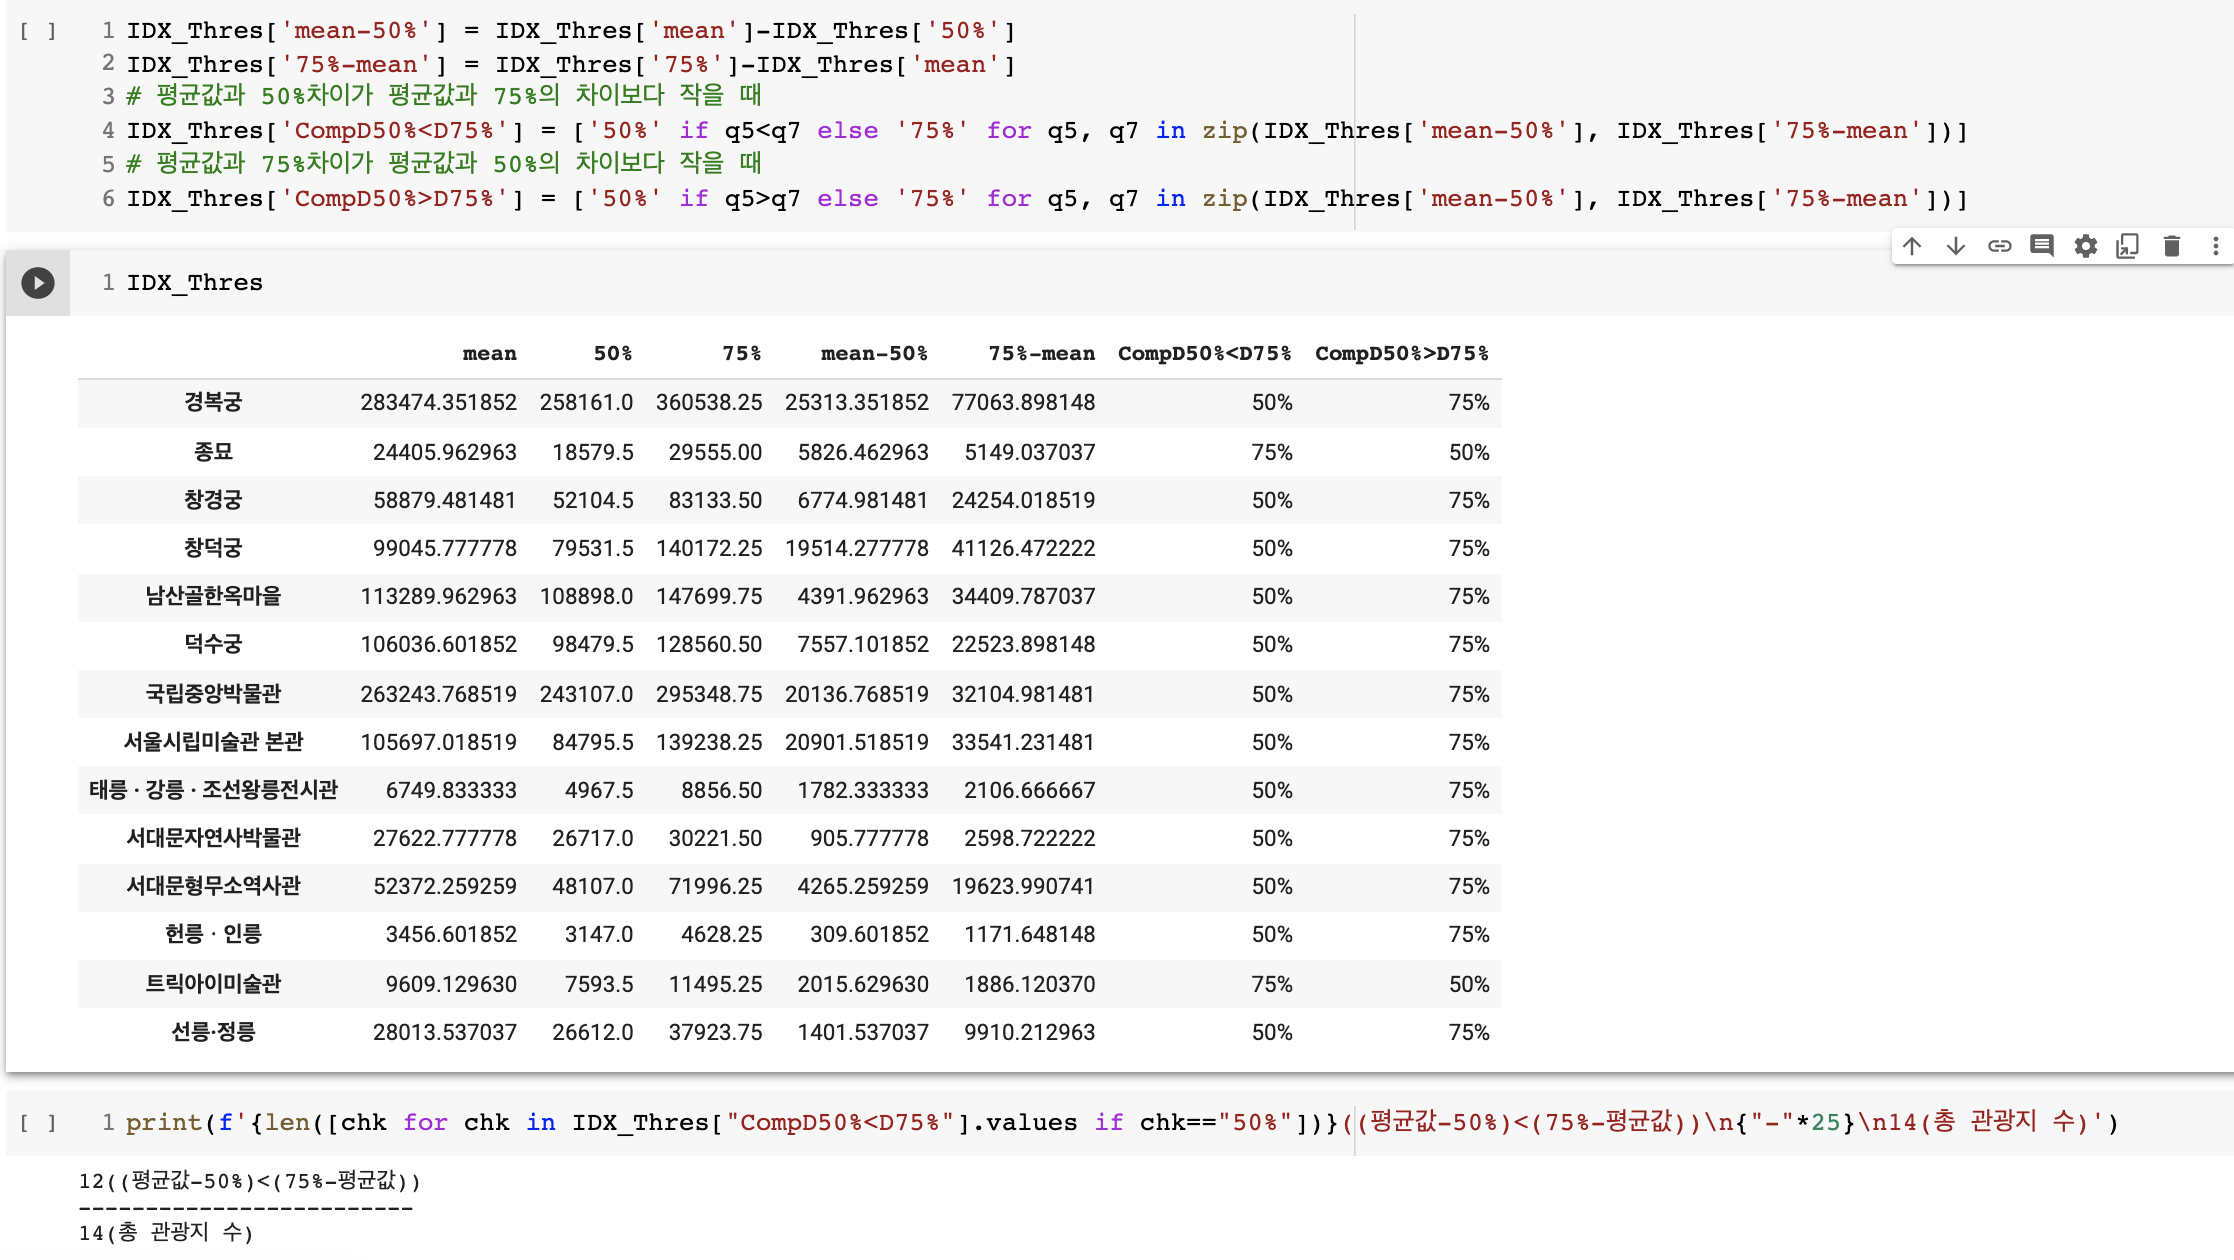

순위는 같은 지수를 가진다면, 지수가 높을수록 상위 순위를 부여(1; 상위 순위, 14; 하위 순위)

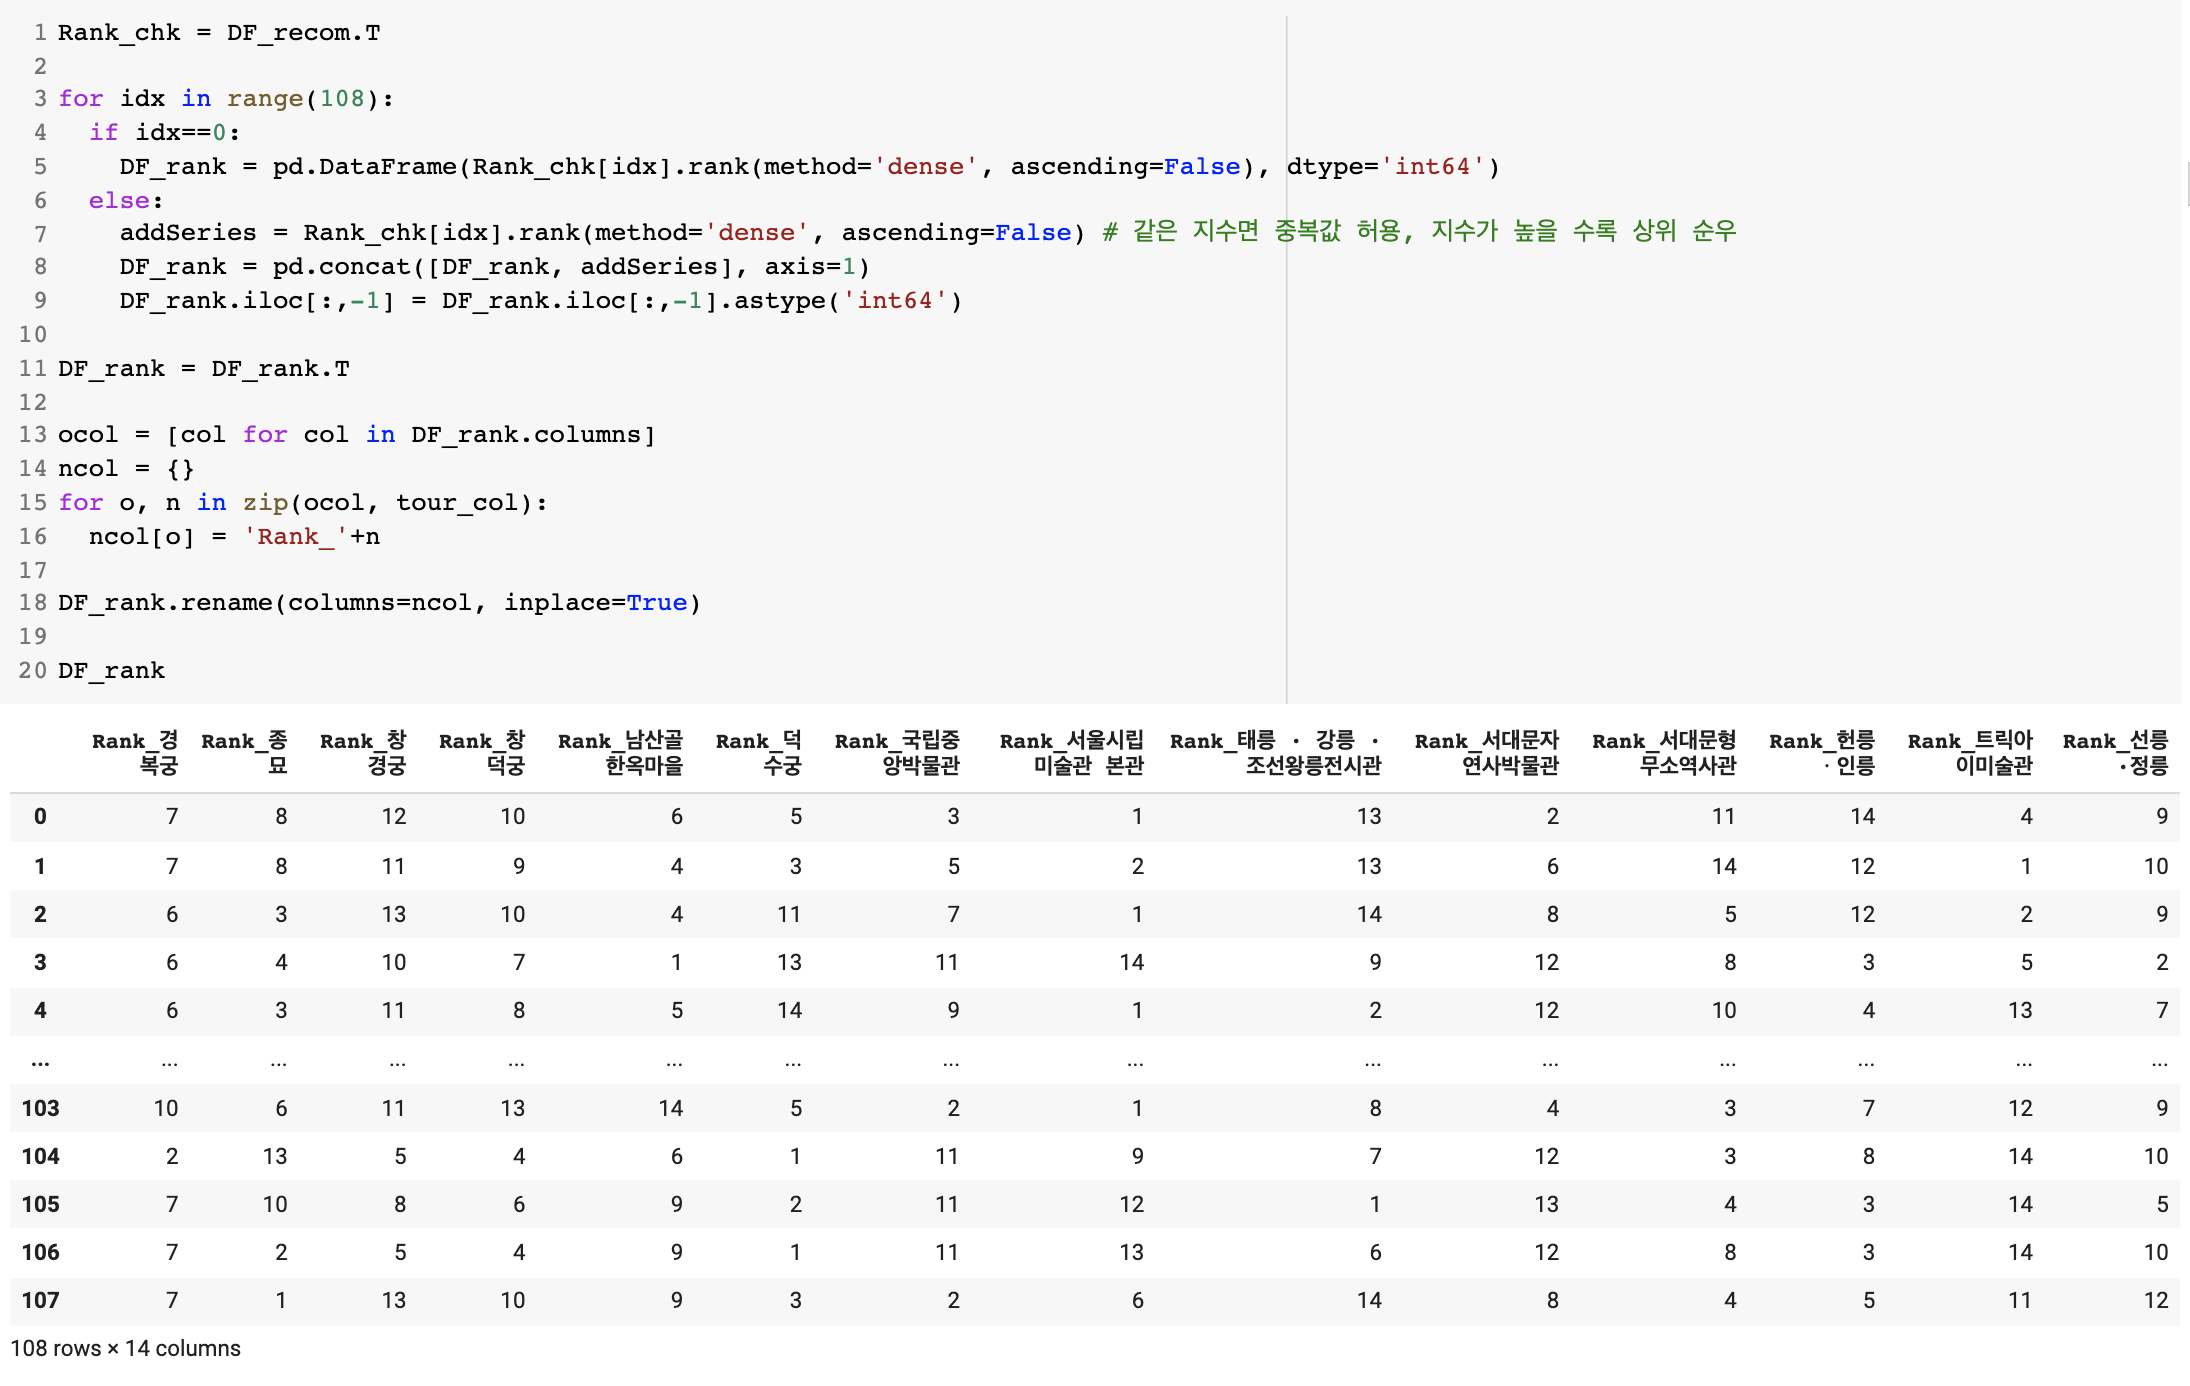

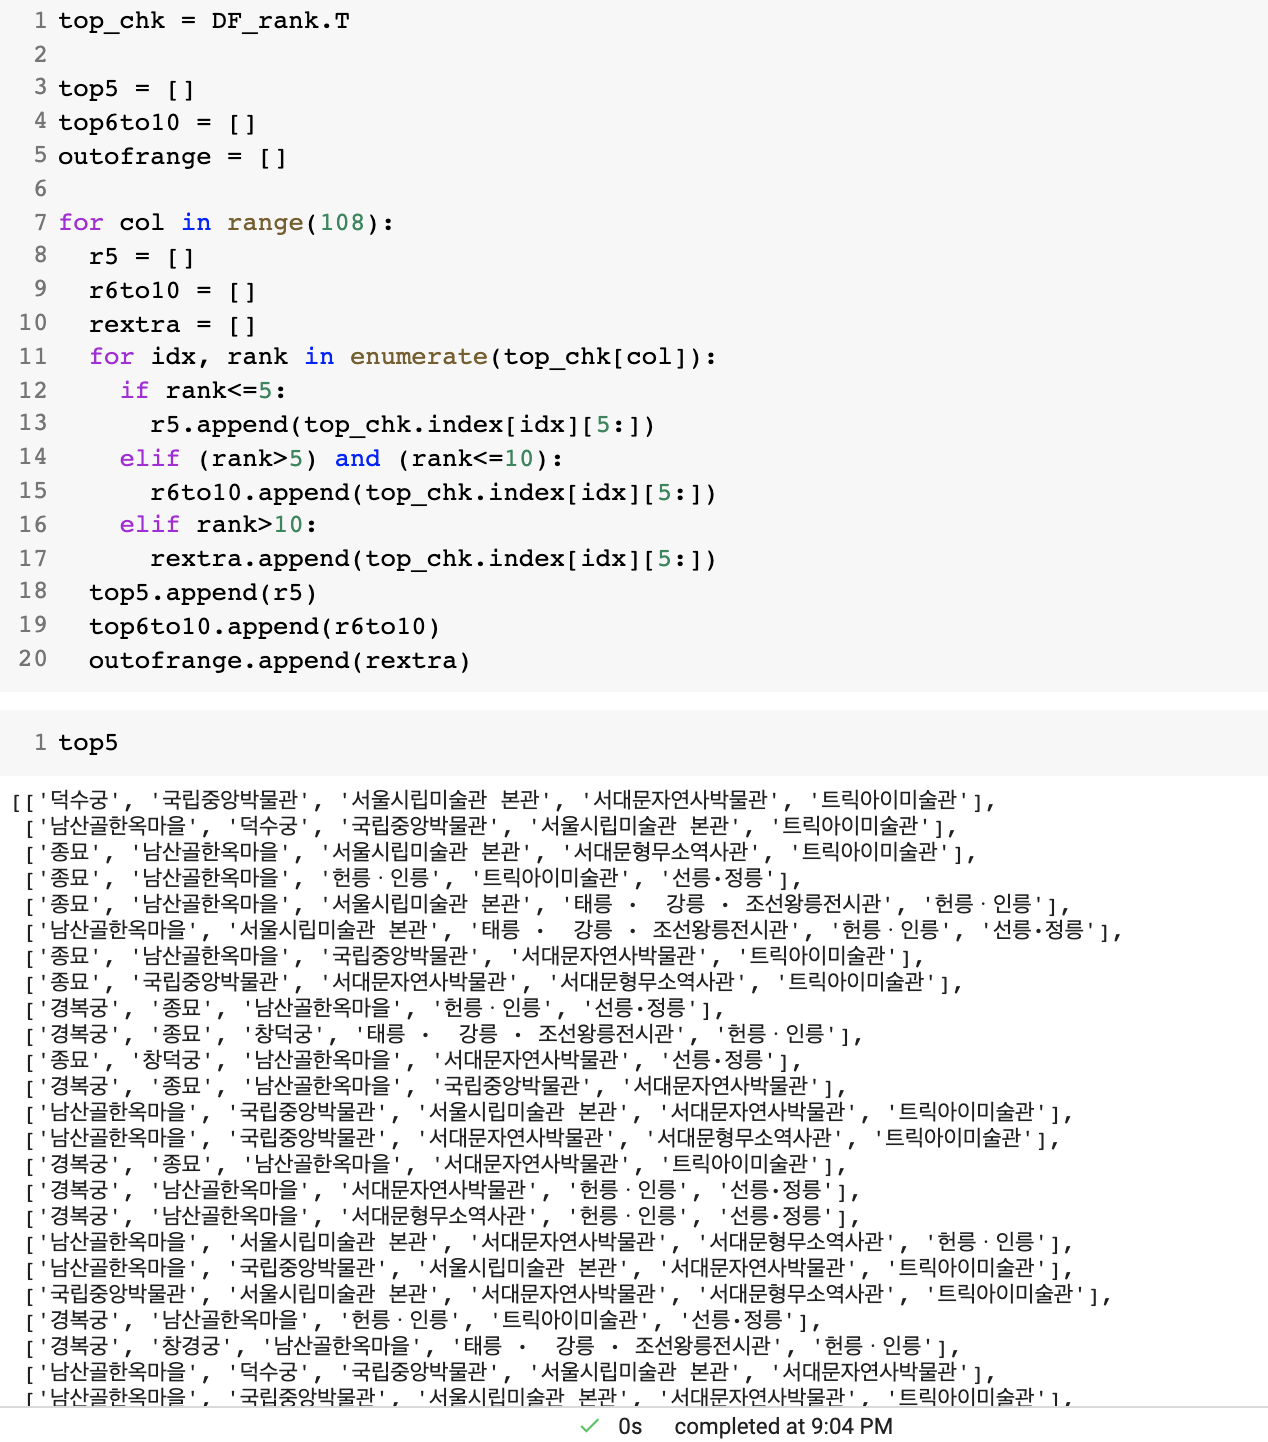

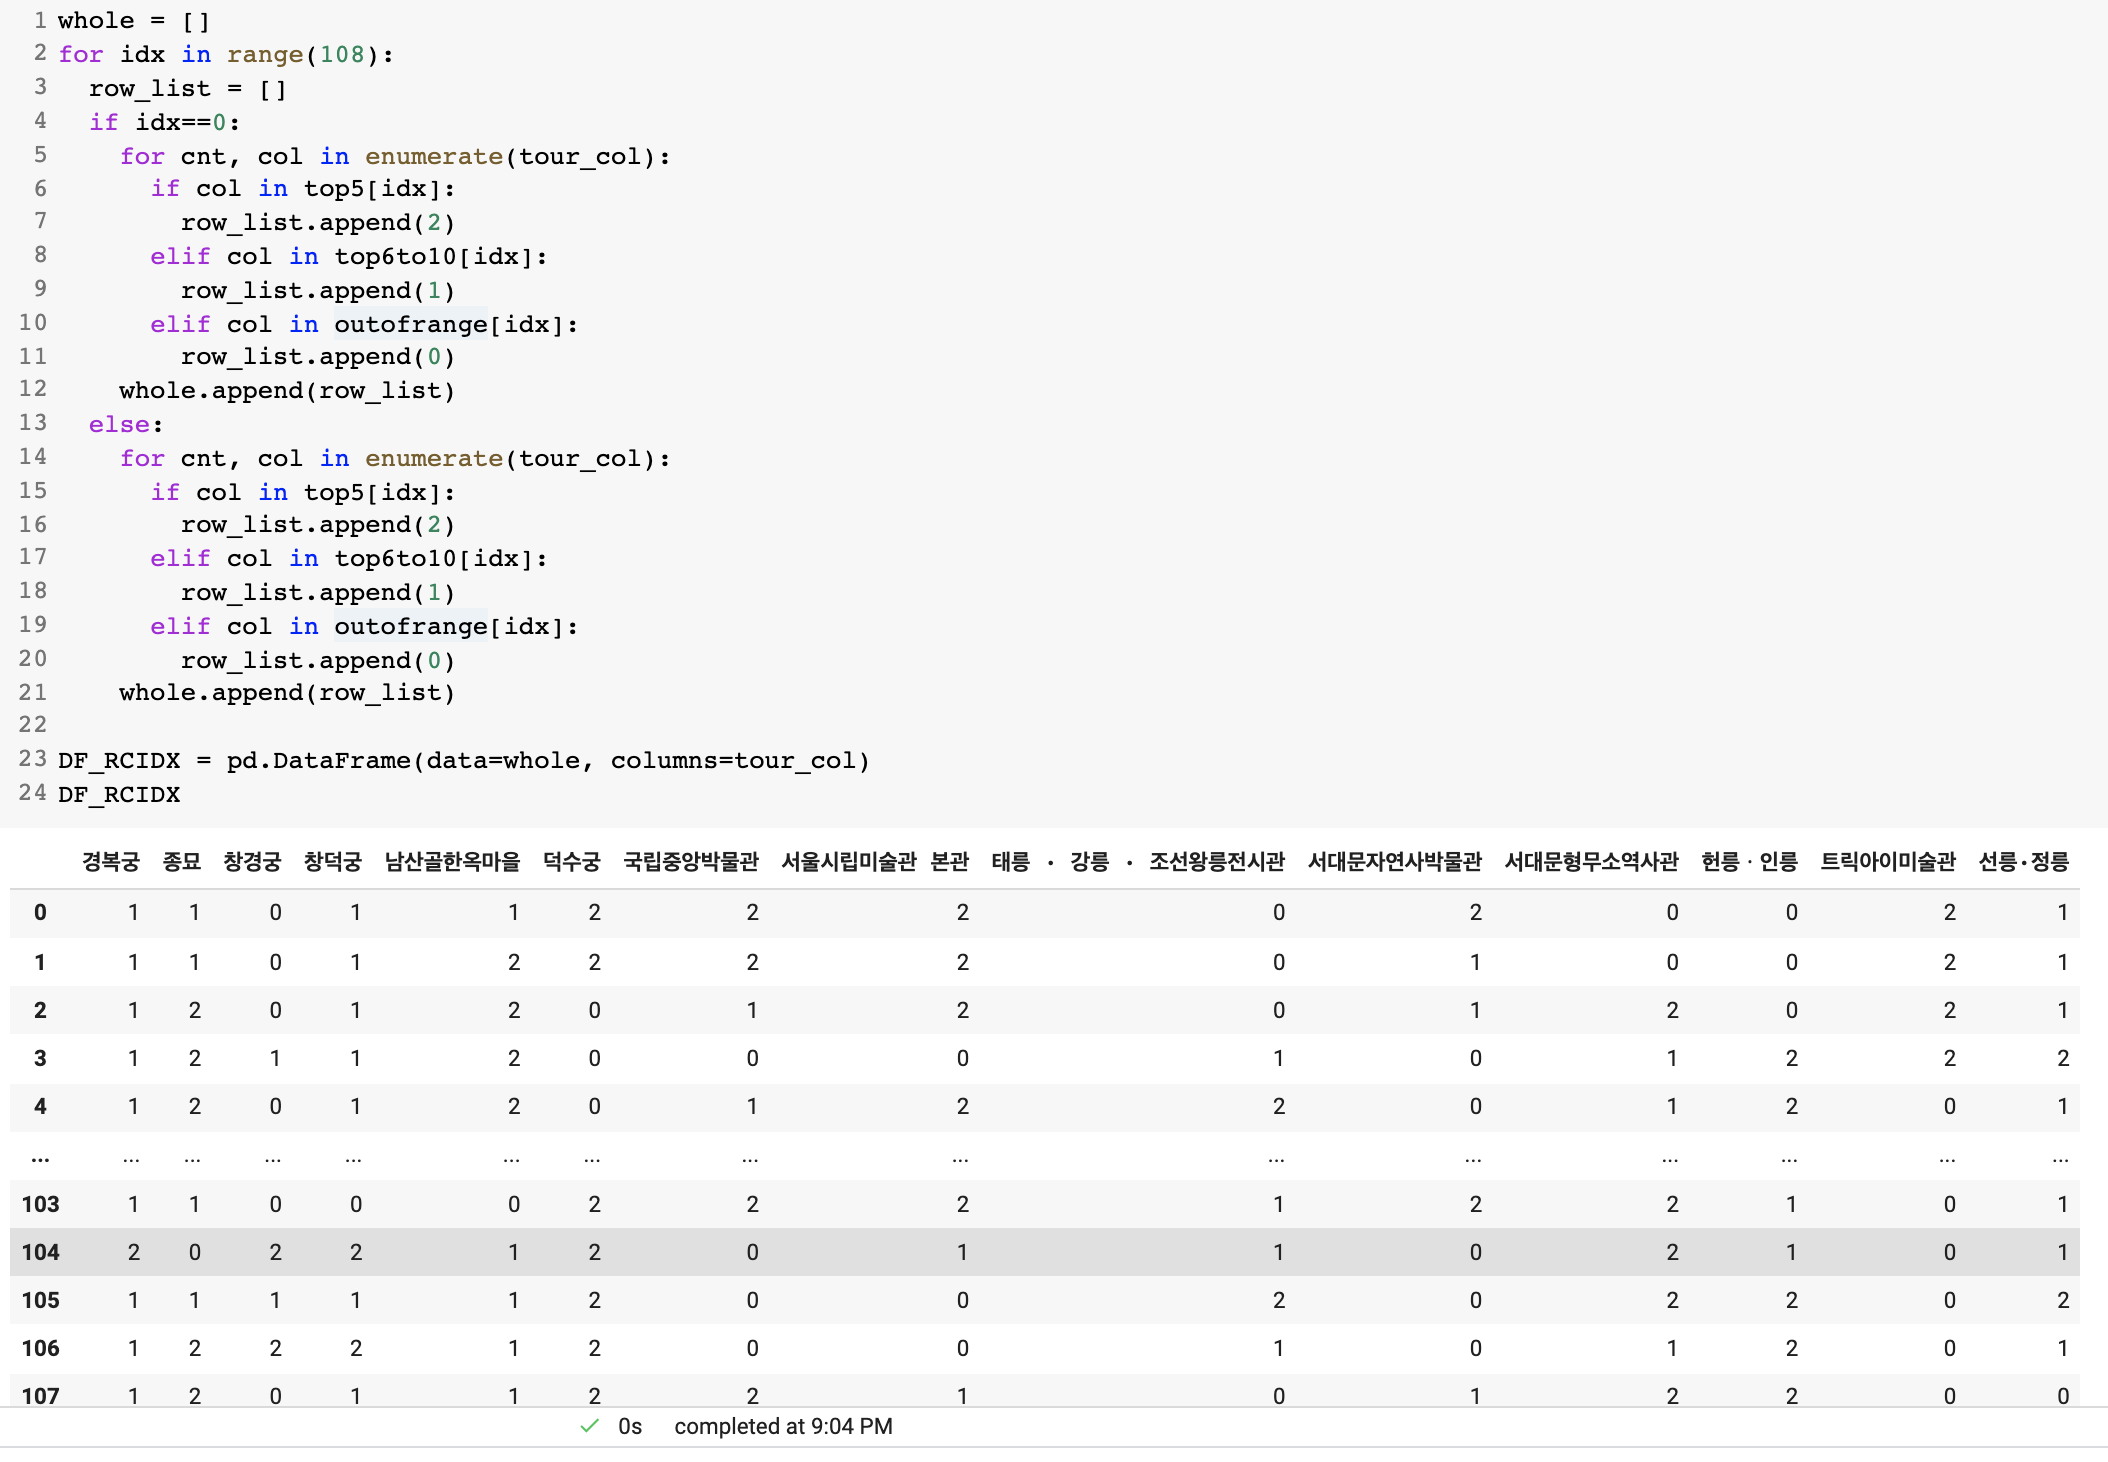

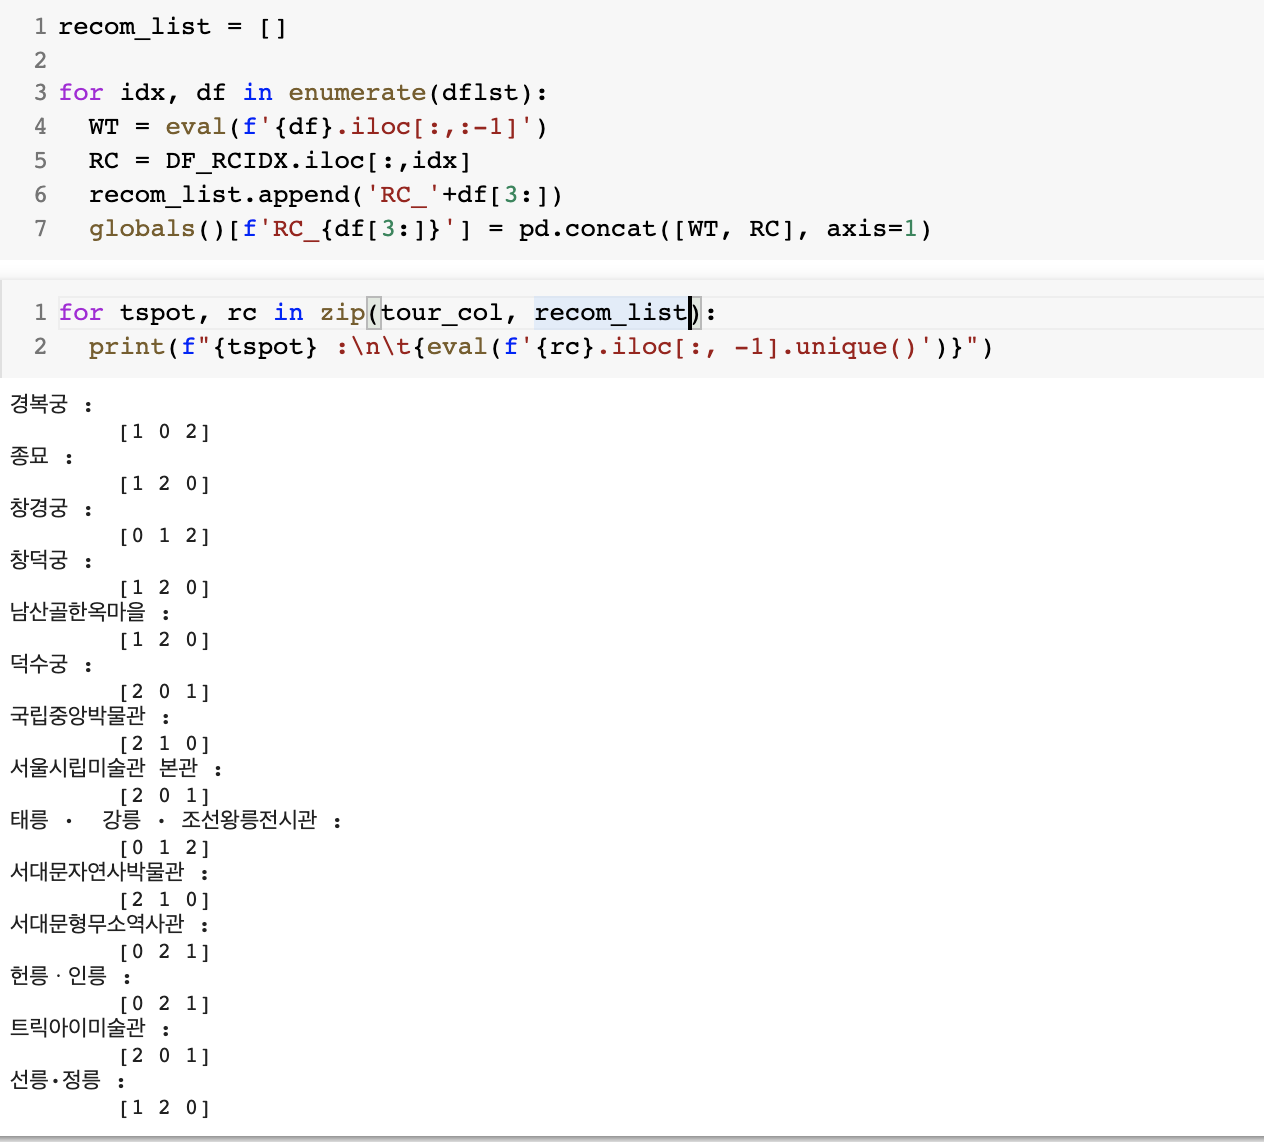

5위 안에 있으면 강력 추천(2),
10위 안에 있으면 추천(1),
11위 이후는 비추천(0)으로 분류

모든 데이터에 3가지 추천 분류가 들어가있음



```
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import multilabel_confusion_matrix

ACC = []
ReC = []
PrC = []
F1 = []
AUC = []
MTLBMatrix = []

for rc in recom_list:
  X = eval(f'{rc}').iloc[:, :-1] # 날찌변수포함
  Y = eval(f'{rc}').iloc[:,-1].values
  clf = LogisticRegression(solver='liblinear')

  

  print(f'\n\nDatesets : {rc}')
  SKFold = StratifiedKFold(n_splits=5)
  cnt_iter = 0
  cv_accuracy = []
  cv_train_idx = []
  cv_test_idx = []
  for train_idx, test_idx in SKFold.split(X, Y):
    cnt_iter += 1
    train_idx = list(train_idx)
    test_idx = list(test_idx)

    cv_train_idx.append(train_idx)
    cv_test_idx.append(test_idx)

    X_train, X_test = X.iloc[train_idx,:], X.iloc[test_idx,:]
    Y_train, Y_test = Y[train_idx], Y[test_idx]

    clf.fit(X_train, Y_train)
    Y_pred  = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy = (round(Decimal(str(accuracy)),2))*100
    print(f'\n#{cnt_iter}\n교차 검증 정확도 : {accuracy}%\t학습 데이터 크기 : {X_train.shape[0]}\t검증 데이터 크기 : {X_test.shape[0]}')
    cv_accuracy.append(accuracy)
  print(f'\n평균 검증 정확도 : {np.mean(cv_accuracy)}%')

  max = np.max(cv_accuracy)
  for idx, scr in enumerate(cv_accuracy):
    if scr==max:
      idx_num = idx

  trn_idx = cv_train_idx[idx_num]
  tst_idx = cv_test_idx[idx_num]

  X_train, X_test, Y_train, Y_test = X.iloc[trn_idx,:], X.iloc[tst_idx,:], Y[trn_idx], Y[tst_idx]
  
  clf = LogisticRegression(solver='liblinear')
  clf.fit(X_train, Y_train)
  Y_pred = clf.predict(X_test)
  Y_proba = clf.predict_proba(X_test)

  acc = accuracy_score(Y_test, Y_pred)
  rec = recall_score(Y_test, Y_pred, average='weighted')
  prec = precision_score(Y_test, Y_pred, average='weighted')
  f1 = f1_score(Y_test, Y_pred, average='weighted')
  auc = roc_auc_score(Y_test, Y_proba, average='weighted', multi_class='ovr')
  mtlbmatrix = multilabel_confusion_matrix(Y_test, Y_pred, labels=[0,1,2])

  ACC.append(acc)
  ReC.append(rec)
  PrC.append(prec)
  F1.append(f1)
  AUC.append(auc)
  MTLBMatrix.append(mtlbmatrix)
  

score = pd.DataFrame([ACC, ReC, PrC, F1, AUC]).rename(index={0:'Accuracy', 1:'Recall', 2:'Precision', 3:'F1-score', 4:'AUC'})
ncol = {}
for o, n in enumerate(tour_col):
  ncol[o] = n
score = score.T.rename(index=ncol)

for col in score.columns:
  score[col] = score[col].apply(lambda x: str(round(Decimal(str(x*100)),2))+"%")

score

# 팀에서 보기로 한 f1, auc 초기화
comp = pd.concat([comp, score.iloc[:,-2:]], axis=1)
```



```
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import multilabel_confusion_matrix

ACC = []
ReC = []
PrC = []
F1 = []
AUC = []
MTLBMatrix = []

for rc in recom_list:
  X = eval(f'{rc}').iloc[:, :-1] # 날찌변수포함
  Y = eval(f'{rc}').iloc[:,-1].values
  clf = XGBClassifier(solver='liblinear')

  

  print(f'\n\nDatesets : {rc}')
  SKFold = StratifiedKFold(n_splits=5)
  cnt_iter = 0
  cv_accuracy = []
  cv_train_idx = []
  cv_test_idx = []
  for train_idx, test_idx in SKFold.split(X, Y):
    cnt_iter += 1
    train_idx = list(train_idx)
    test_idx = list(test_idx)

    cv_train_idx.append(train_idx)
    cv_test_idx.append(test_idx)

    X_train, X_test = X.iloc[train_idx,:], X.iloc[test_idx,:]
    Y_train, Y_test = Y[train_idx], Y[test_idx]

    clf.fit(X_train, Y_train)
    Y_pred  = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy = (round(Decimal(str(accuracy)),2))*100
    print(f'\n#{cnt_iter}\n교차 검증 정확도 : {accuracy}%\t학습 데이터 크기 : {X_train.shape[0]}\t검증 데이터 크기 : {X_test.shape[0]}')
    cv_accuracy.append(accuracy)
  print(f'\n평균 검증 정확도 : {np.mean(cv_accuracy)}%')

  max = np.max(cv_accuracy)
  for idx, scr in enumerate(cv_accuracy):
    if scr==max:
      idx_num = idx

  trn_idx = cv_train_idx[idx_num]
  tst_idx = cv_test_idx[idx_num]

  X_train, X_test, Y_train, Y_test = X.iloc[trn_idx,:], X.iloc[tst_idx,:], Y[trn_idx], Y[tst_idx]
  
  clf = XGBClassifier(solver='liblinear')
  clf.fit(X_train, Y_train)
  Y_pred = clf.predict(X_test)
  Y_proba = clf.predict_proba(X_test)

  acc = accuracy_score(Y_test, Y_pred)
  rec = recall_score(Y_test, Y_pred, average='weighted')
  prec = precision_score(Y_test, Y_pred, average='weighted')
  f1 = f1_score(Y_test, Y_pred, average='weighted')
  auc = roc_auc_score(Y_test, Y_proba, average='weighted', multi_class='ovr')
  mtlbmatrix = multilabel_confusion_matrix(Y_test, Y_pred, labels=[0,1,2])

  ACC.append(acc)
  ReC.append(rec)
  PrC.append(prec)
  F1.append(f1)
  AUC.append(auc)
  MTLBMatrix.append(mtlbmatrix)
  

score = pd.DataFrame([ACC, ReC, PrC, F1, AUC]).rename(index={0:'Accuracy', 1:'Recall', 2:'Precision', 3:'F1-score', 4:'AUC'})
ncol = {}
for o, n in enumerate(tour_col):
  ncol[o] = n
score = score.T.rename(index=ncol)

for col in score.columns:
  score[col] = score[col].apply(lambda x: str(round(Decimal(str(x*100)),2))+"%")

score
# 팀에서 보기로 결정한 f1, auc만 추가
comp = pd.concat([comp, score.iloc[:,-2:]], axis=1)
```


```
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import multilabel_confusion_matrix

ACC = []
ReC = []
PrC = []
F1 = []
AUC = []
MTLBMatrix = []

for rc in recom_list:
  X = eval(f'{rc}').iloc[:, :-1] # 날찌변수포함
  Y = eval(f'{rc}').iloc[:,-1].values
  clf = CalibratedClassifierCV(LinearSVC(max_iter=10000))

  print(f'\n\nDatesets : {rc}')
  SKFold = StratifiedKFold(n_splits=5)
  cnt_iter = 0
  cv_accuracy = []
  cv_train_idx = []
  cv_test_idx = []
  for train_idx, test_idx in SKFold.split(X, Y):
    cnt_iter += 1
    train_idx = list(train_idx)
    test_idx = list(test_idx)

    cv_train_idx.append(train_idx)
    cv_test_idx.append(test_idx)

    X_train, X_test = X.iloc[train_idx,:], X.iloc[test_idx,:]
    Y_train, Y_test = Y[train_idx], Y[test_idx]

    clf.fit(X_train, Y_train)
    Y_pred  = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy = (round(Decimal(str(accuracy)),2))*100
    print(f'\n#{cnt_iter}\n교차 검증 정확도 : {accuracy}%\t학습 데이터 크기 : {X_train.shape[0]}\t검증 데이터 크기 : {X_test.shape[0]}')
    cv_accuracy.append(accuracy)
  print(f'\n평균 검증 정확도 : {np.mean(cv_accuracy)}%')

  max = np.max(cv_accuracy)
  for idx, scr in enumerate(cv_accuracy):
    if scr==max:
      idx_num = idx

  trn_idx = cv_train_idx[idx_num]
  tst_idx = cv_test_idx[idx_num]

  X_train, X_test, Y_train, Y_test = X.iloc[trn_idx,:], X.iloc[tst_idx,:], Y[trn_idx], Y[tst_idx]
  
  clf = CalibratedClassifierCV(LinearSVC(max_iter=10000))

  clf.fit(X_train, Y_train)
  Y_pred = clf.predict(X_test)
  Y_proba = clf.predict_proba(X_test)

  acc = accuracy_score(Y_test, Y_pred)
  rec = recall_score(Y_test, Y_pred, average='weighted')
  prec = precision_score(Y_test, Y_pred, average='weighted')
  f1 = f1_score(Y_test, Y_pred, average='weighted')
  auc = roc_auc_score(Y_test, Y_proba, average='weighted', multi_class='ovr')
  mtlbmatrix = multilabel_confusion_matrix(Y_test, Y_pred, labels=[0,1,2])

  ACC.append(acc)
  ReC.append(rec)
  PrC.append(prec)
  F1.append(f1)
  AUC.append(auc)
  MTLBMatrix.append(mtlbmatrix)
  
score = pd.DataFrame([ACC, ReC, PrC, F1, AUC]).rename(index={0:'Accuracy', 1:'Recall', 2:'Precision', 3:'F1-score', 4:'AUC'})
ncol = {}
for o, n in enumerate(tour_col):
  ncol[o] = n
score = score.T.rename(index=ncol)

for col in score.columns:
  score[col] = score[col].apply(lambda x: str(round(Decimal(str(x*100)),2))+"%")

score

# score 중 팀에서 보기로 한 f1, auc 추가
comp = pd.concat([comp, score.iloc[:,-2:]], axis=1)
```




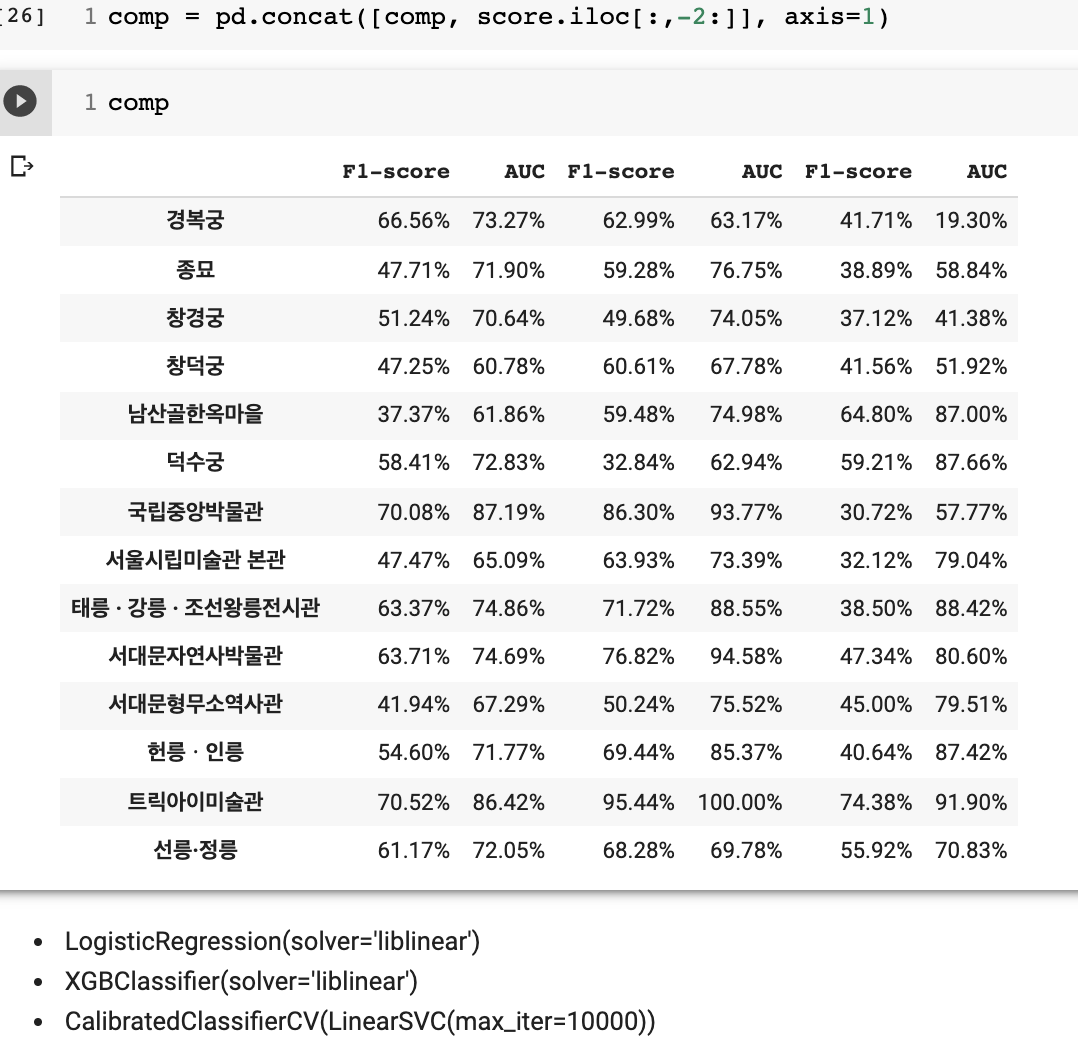

점수가 너무 낮아서 3가지에서 5가지 분류로 바꿔야 하는지, 아니면 순위를 넣고 구해야하는지,,,
고민을 하다가 우선 날씨변수를 전체적으로 입력한 뒤, multilabel 혹은 multiclass을 뽑기 위한 시도를 해 볼 가치가 있다고 판단

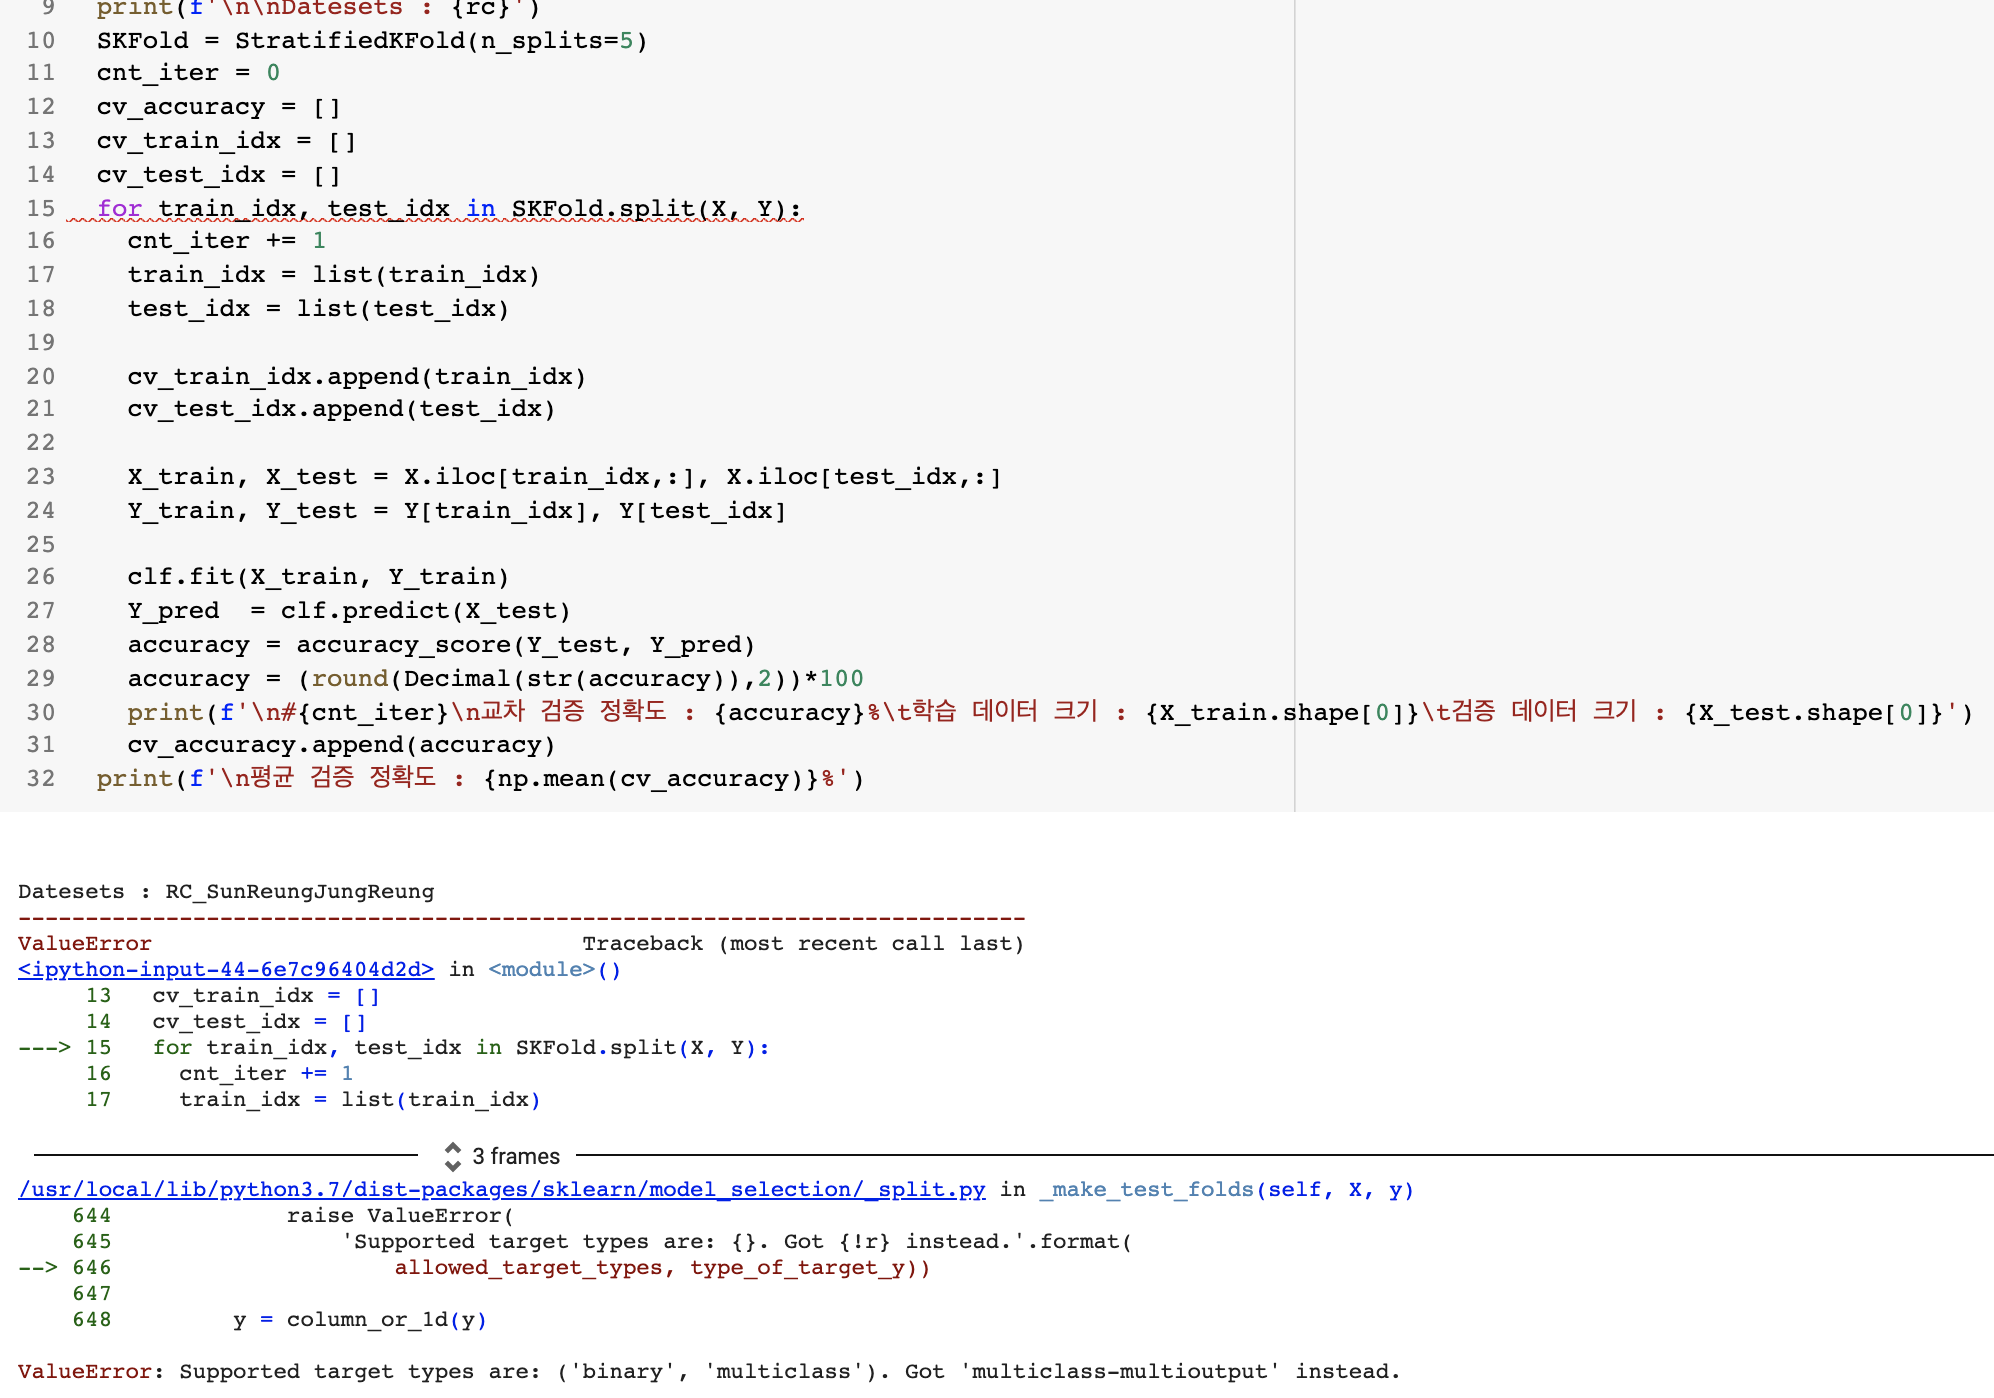


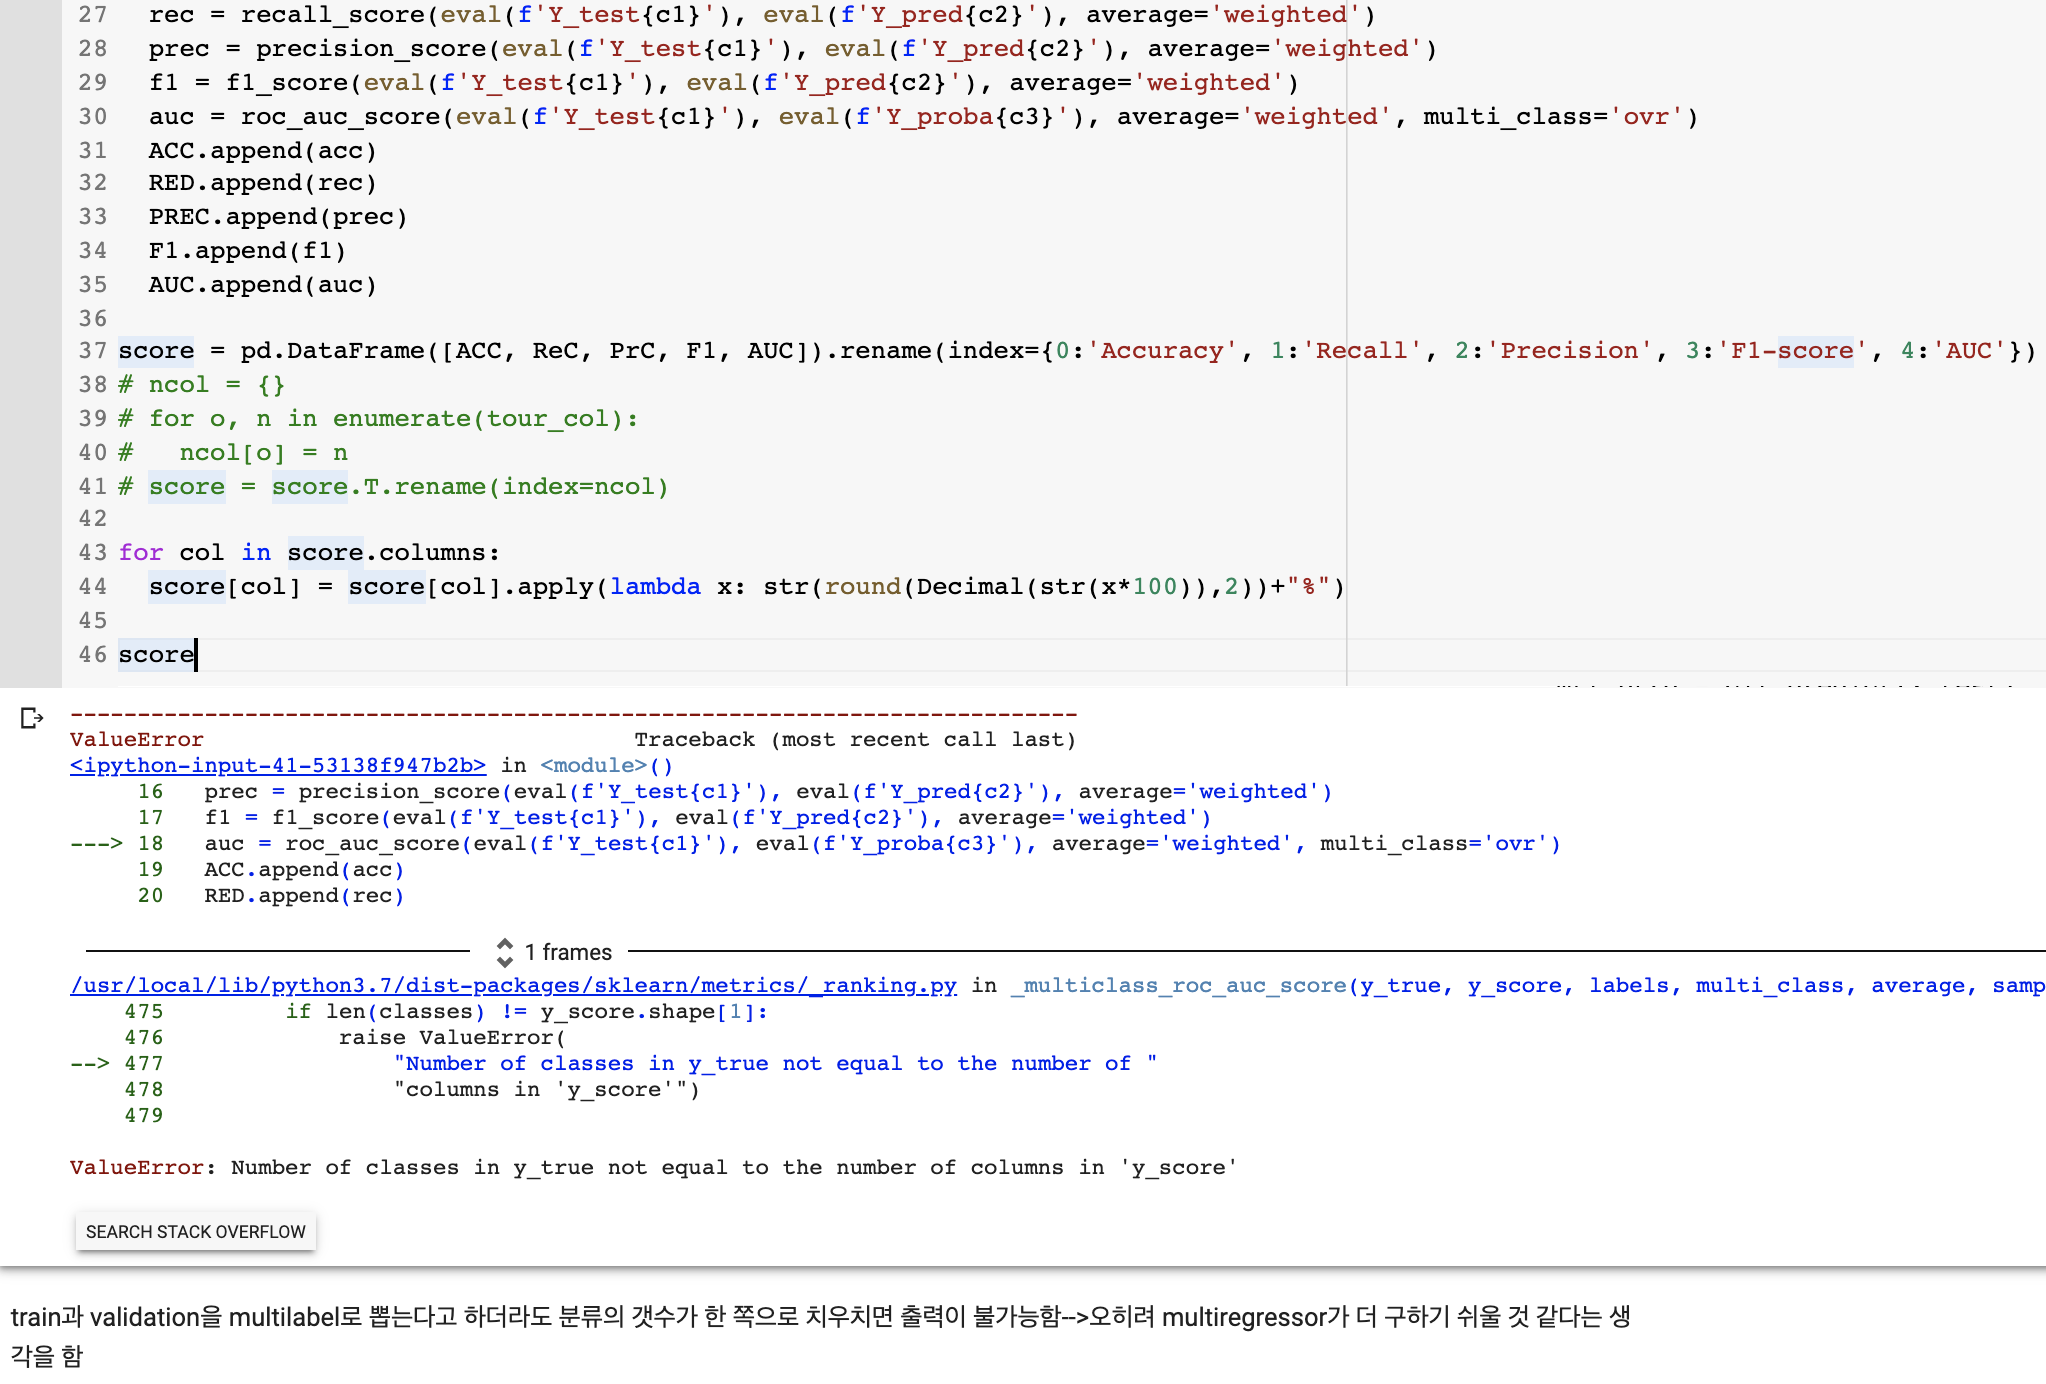

multiclass(label)의 경우, 추천 비추천으로 두어야 지표를 뽑을 수 있었고, multilabel의 경우 validation과 train의 label count가 맞지 않는 이슈가 있었음...

중간에 날씨데이터 ETL 재검증을 하고, 다시 14개의 데이터 프레임을 받아서 우선 회귀 풀이 중
(MultiOutputRegressor가 적용되려면, 공통 날씨 변수가 들어가야 하기 때문에...우선 받은 데이터를 각각 KFold의 값만 달리해서 확인하고 있음)



```
# 검증 평가 지표(R2, RMSE, SMAPE)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
# def mape(y_true, y_pred):
#    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100
# def smape(y_true, y_pred):
#     return 1/len(y_true) * np.sum(2 * np.abs(y_pred-y_true) / (np.abs(y_true) + np.abs(y_pred))*100)
# def smape(y_true, y_pred):
#     return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))    
# smape은 다 비교를 해도, 값이 동일했음
```



```
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

R2 = []
RMSE = []
MAPE = []
SMAPE = []

for rg in dflst:
  X = eval(f'{rg}').iloc[:, :-1]
  Y = eval(f'{rg}').iloc[:,-1].values
  reg = XGBRegressor(objective='reg:squarederror')

  print(f'\n\nDatesets : {rg}')
  KFOLD = KFold(n_splits=5)
  cnt_iter = 0
  cv_r2 = []
  cv_train_idx = []
  cv_test_idx = []
  cv_weirdTRN_idx = []
  cv_weirdTST_idx = []
  for train_idx, test_idx in KFOLD.split(X, Y):
    cnt_iter += 1
    train_idx = list(train_idx)
    test_idx = list(test_idx)

    X_train, X_test = X.iloc[train_idx,:], X.iloc[test_idx,:]
    Y_train, Y_test = Y[train_idx], Y[test_idx]

    reg.fit(X_train, Y_train)
    Y_pred  = reg.predict(X_test)
    r2 = r2_score(Y_test, Y_pred)
    r2 = (round(Decimal(str(r2)),2))*100
    if (r2>=100) or (r2<=-100):
      cv_weirdTRN_idx.append(train_idx)
      cv_weirdTST_idx.append(test_idx)
    else:
      cv_train_idx.append(train_idx)
      cv_test_idx.append(test_idx)
      print(f'\n#{cnt_iter}\n교차 검증 정확도 : {r2}%\t학습 데이터 크기 : {X_train.shape[0]}\t검증 데이터 크기 : {X_test.shape[0]}')
      cv_r2.append(r2)
  print(f'\n평균 검증 R2(절대값) : {round(np.mean(np.abs(cv_r2)),3)}%')

  max = np.max(np.abs(cv_r2))
  for idx, scr in enumerate(np.abs(cv_r2)):
    if scr==max:
      idx_num = idx

  trn_idx = cv_train_idx[idx_num]
  tst_idx = cv_test_idx[idx_num]

  X_train, X_test, Y_train, Y_test = X.iloc[trn_idx,:], X.iloc[tst_idx,:], Y[trn_idx], Y[tst_idx]

  reg = XGBRegressor(objective='reg:squarederror')
  reg.fit(X_train, Y_train)
  Y_pred = reg.predict(X_test)
  
  # r_2 = r2_score(Y_test, Y_pred)
  r_2 = Decimal(str(r2_score(Y_test, Y_pred)))
  r_2 = round(r_2,3)*100
  Rmse = rmse(Y_test, Y_pred)
  Mape = mape(Y_test, Y_pred)
  Smape = smape(Y_test, Y_pred)

  R2.append(r_2)
  RMSE.append(Rmse)
  MAPE.append(Mape)
  SMAPE.append(Smape)
    
# score = pd.DataFrame([R2, RMSE, MAPE, SMAPE]).rename(index={0:'R2', 1:'RMSE', 2:'MAPE', 3:'SMAPE'})
score = pd.DataFrame([R2, RMSE, SMAPE]).rename(index={0:'R2', 1:'RMSE', 2:'SMAPE'})
ncol = {}
for o, n in enumerate(tour_col):
  ncol[o] = n
score = score.T.rename(index=ncol)

score
```

$$-1<R^2<1$$


해당 범주를 벗어나는 수치의 값은 오버피팅 혹은 부적합 데이터라고 판단하고 $R^2$을 기준으로 절대값이 높은 train index, validation index를 사용해서 모델 점수를 구함



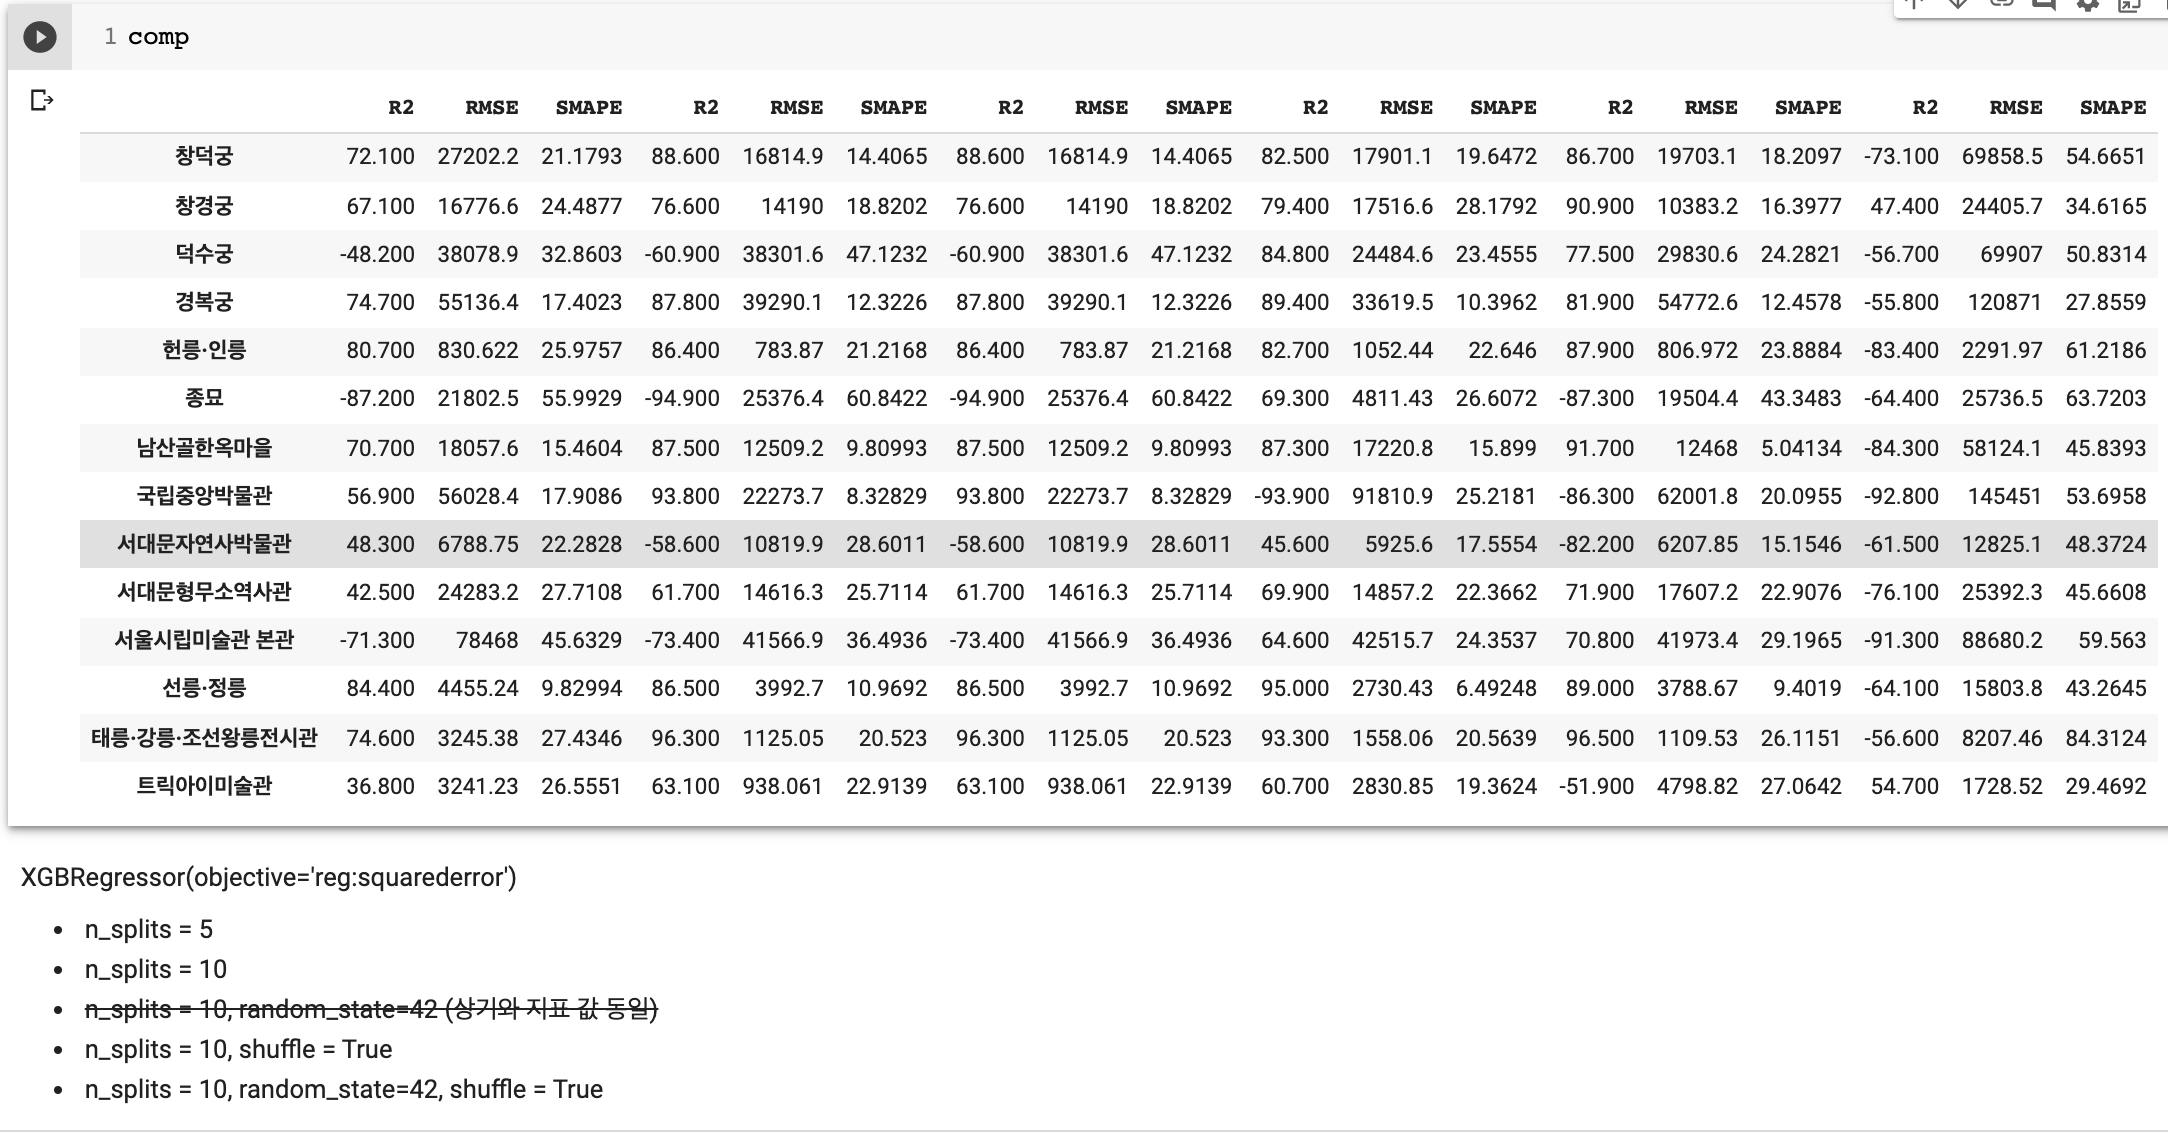

재검증을 거친 데이터로 모델 최적화 및 데이터 증강을 거쳤으나 점수가 제대로 잡히지 않는다면,,,

* 전체 날씨 변수(혹은 날씨 변수 중 공통_유사_하게 들어간 동일 날씨 변수)에 관광객 수를 타깃으로 삼아 MultiOutputRegressor or RegresssorChain
* LMM, GMM, PMM 등으로 잡을 수 있는지 더 고려하겠음
* 딥러닝 사용 이유(코드 구성)에 대한 설명이 되고, 지표도 좋다면 딥러닝도 하나의 방법이 될 수도 있을 것 같음